<a href="https://colab.research.google.com/github/s18621/ZUM/blob/main/ZUM_projekt_s18621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Setup

In [1]:
!pip install demoji
!pip install transformers==4.28.0
!pip install -U datasets
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.

In [2]:
!pip install -U spacy
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
2023-05-24 14:22:18.334452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 14:22:20.853312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-24 14:22:23.266756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

In [3]:
!pip install unidecode -q
!pip install gensim==4.3.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 16.2 MB/s eta 0:00:00


### Imports

In [2]:
import spacy
from nltk.stem.snowball import stopwords
import re
from datasets import Dataset, load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
from google.colab import drive
import nltk
from sklearn import metrics
import logging
from time import time 
import matplotlib.pyplot as plt
from unidecode import unidecode
from sklearn.svm import SVC, LinearSVC, NuSVC
from gensim.models import Word2Vec
from collections import defaultdict
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec
import demoji
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plot
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
from transformers import pipeline
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
import gensim
from keras.models import Sequential
from sklearn.cluster import KMeans
from keras.utils import pad_sequences, to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report


### Gather Data from Tweets

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
demoji.download_codes()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-2-fe97c8cc8e71>:7: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
tweets = []

In [82]:
from datasets import Dataset
from datetime import datetime
from dateutil import rrule
from dateutil.relativedelta import relativedelta
import snscrape.modules.twitter as smt
import logging
logging.getLogger().setLevel(logging.ERROR)


attributes_container = []

start_date = datetime(2023, 5, 1) #Mr Beast month in which video with 1000 blind people were realised
end_date = datetime(2023, 5, 30) # Untill now, we got 80 days

for dateSince in rrule.rrule(rrule.WEEKLY, dtstart=start_date, until=end_date):
  dateUntil = dateSince+relativedelta(weeks=1)
  

  sample = f'"#Eurovision2023" lang:en --since:{dateSince:%Y-%m-%d} until:{dateUntil:%Y-%m-%d}'
  query = f'{sample}'
  twt_data = smt.TwitterSearchScraper(query)

  for i,tweet in enumerate(twt_data.get_items()):
    if i>9000:
        break
    if i%1000 == 0:
      print(i)

    tweets.append([tweet.date,tweet.rawContent])

  print(dateSince,' ',dateUntil)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
2023-05-01 00:00:00   2023-05-08 00:00:00
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
2023-05-08 00:00:00   2023-05-15 00:00:00
0
1000
2000
3000
2023-05-15 00:00:00   2023-05-22 00:00:00
0
2023-05-22 00:00:00   2023-05-29 00:00:00
2023-05-29 00:00:00   2023-06-05 00:00:00


In [85]:
tweet_df = pd.DataFrame(tweets)
file_path = '/content/drive/MyDrive/ZUM/scrapped_tweets.csv'
tweet_df.to_csv(file_path)

In [126]:
tweet_df.rename(columns = {0:'date',1:'content'}, inplace = True)
tweet_df.head(10)

,date,content
0,2023-05-07 23:59:05+00:00,Seriously… Liverpool is not just the city cent...
1,2023-05-07 23:55:14+00:00,A fantastic day seeing #Eurovision2023 entrie...
2,2023-05-07 23:53:46+00:00,#EUROVISION2023 STARTS TODAY\nHAPPY #EUROVISIO...
3,2023-05-07 23:52:12+00:00,Them drones 😍 #BigEurovisionWelcome #Eurovisio...
4,2023-05-07 23:49:05+00:00,🔹Lord Of The Lost 🇩🇪\n🔹Joker Out 🇸🇮\n\n📸Jonath...
5,2023-05-07 23:47:31+00:00,This city knows how to throw a party! @TNLUK @...
6,2023-05-07 23:47:08+00:00,"My City, My People, My Heart ❤️ @JamieWebster9..."
7,2023-05-07 23:46:12+00:00,#Eurovision2023 Father Ted and Dougal would ha...
8,2023-05-07 23:44:09+00:00,Well that was beautiful #Eurovision2023 https:...
9,2023-05-07 23:43:31+00:00,How amazing was the welcome party at St George...


###Clean data and remove stopwords

In [15]:
nlp = spacy.load("en_core_web_md", disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')

def remove_stopwards(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))


In [16]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

In [17]:
def del_emoji(text):
  emoji_meaning = demoji.findall(text)
  text_meanin = text
  for emoji, translate in emoji_meaning.items():
    text = text.replace(emoji, translate)
  return text

In [18]:
def remove_small(text):
  if len(text.split()) > 4: return text
  else: return ''

In [19]:
def clean_twt(df):

  #Remove duplicats
  df.drop_duplicates(subset=['content'], inplace=True)

  #Remove small tweets
  df['content'] = df['content'].apply(remove_small)

  #Remove empty
  df.replace('', np.nan, inplace=True)
  df.dropna(subset=['content'], inplace=True)

  #Remove @
  re_at = re.compile(r'\@\w+')
  df['content'] = df['content'].apply(lambda x: re_at.sub('', x))

  #Remove #
  re_hs = re.compile(r'\#\w+')
  df['content'] = df['content'].apply(lambda x: re_hs.sub('', x))

  #Remove Links
  re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
  df['content'] = df['content'].apply(lambda x: re_url.sub('', x))

  #Remove special char
  re_character = re.compile(r"[^a-zA-Z\s']")
  df['content'] = df['content'].apply(lambda x: re_character.sub('', x))

  #Remove '
  re_suffixes = re.compile(r"'[a-zA-Z]*")
  df['content'] = df['content'].apply(lambda x: re_suffixes.sub('',x))

  #change emoji
  df['content'] = df['content'].apply(del_emoji)

  #lowercase
  df['content'] = df['content'].apply(lambda x: x.lower())

  #Remove stop words
  df['content'] = df['content'].apply(remove_stopwards)

  #lemmatize
  df['content'] = df['content'].apply(lemmatize)

  file_path = '/content/drive/MyDrive/ZUM/clean_tweets.csv'
  df.to_csv(file_path)
  
  return df

In [20]:
clean_df = clean_twt(tweet_df)

NameError: ignored

In [ ]:
file_path = '/content/drive/MyDrive/ZUM/clean_tweets.csv'
clean_df = pd.read_csv(file_path)

In [ ]:
clean_df.head(10)

###Create word embeddings for vectorized representation of words (Sentiment Analysis, Data Classification)

In [21]:
file_path = '/content/drive/MyDrive/ZUM/clean_tweets.csv'
clean_df = pd.read_csv(file_path)
clean_df = clean_df.drop(columns="date",axis =1)
clean_df = clean_df.drop(columns="id",axis =1)
clean_df = clean_df.drop(columns="Unnamed: 0",axis =1)
clean_df.head(10)  


,content
0,seriously liverpool city centre abundance park...
1,fantastic day eurovision entry close liverpool
2,eurovision start today happy eurovision week s...
3,lord lose joker jonathanjacobjohansson eurovis...
4,city know throw party eurovision eurovision
5,city people heart totally boss tonight bigeuro...
6,eurovision father ted dougal ace eire
7,amazing welcome party st georges hall evening ...
8,superb tonight bigeurovisionwelcome eurovision...
9,great evening liverpool big eurovision welcome...


In [22]:
file_model = clean_df.copy()

In [23]:
file_model.content = file_model.content.apply(lambda x: x.split())

In [24]:
sent = [row for row in file_model.content]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[1]

['fantastic', 'day', 'eurovision', 'entry', 'close', 'liverpool']

In [25]:
file_export = file_model.copy()
file_export['old_content'] = file_export.content
file_export.old_content = file_export.old_content.str.join(' ')
file_export.content = file_export.content.apply(lambda x: ' '.join(bigram[x]))
file_export[['content']].to_csv('prepared_dataset.csv', index=False)

In [26]:
w2v_model = Word2Vec(min_count=5,
                     window=3,
                     vector_size=400,
                     sample=1e-5, 
                     alpha=0.01, 
                     min_alpha=0.0001, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

start = time()

w2v_model.build_vocab(sentences, progress_per=50000)

print('Time to build vocab: {} mins'.format(round((time() - start) / 60, 2)))

Time to build vocab: 0.01 mins


In [27]:
start = time()

w2v_model.train(sentences,
                total_examples=w2v_model.corpus_count,
                epochs=30,
                report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - start) / 60, 2)))

w2v_model.init_sims(replace=True)

<ipython-input-27-1906ea12accd>:10: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


Time to train the model: 0.22 mins


In [28]:
w2v_model.save("word2vec.model")

####KMeans cluster

In [29]:
w_vectors = Word2Vec.load("word2vec.model").wv

model = KMeans(n_clusters=2,
               max_iter=1000,
               random_state=True,
               n_init=50)
model.fit(X=w_vectors.vectors.astype('double'))

KMeans(max_iter=1000, n_clusters=2, n_init=50, random_state=True)

In [30]:
print(w_vectors.similar_by_vector(model.cluster_centers_[1], topn=50, restrict_vocab=None))
print(w_vectors.similar_by_vector(model.cluster_centers_[0], topn=50, restrict_vocab=None))

[('hilda', 0.9999356865882874), ('eaea_m', 0.9999351501464844), ('turquoisecarpet_unitedbymusic', 0.9999330043792725), ('joelembiid_amici', 0.9999313354492188), ('book', 0.9999312162399292), ('m_stay', 0.9999308586120605), ('link', 0.9999302625656128), ('match', 0.9999301433563232), ('share', 0.999928891658783), ('sing', 0.9999278783798218), ('people', 0.9999277591705322), ('watergun_m', 0.9999276995658875), ('fishtanklive_gidle', 0.9999276399612427), ('join', 0.9999275803565979), ('wonderful', 0.9999275207519531), ('mufctakeover_ksifourni', 0.9999265670776367), ('dance_party', 0.9999263882637024), ('post', 0.9999261498451233), ('bbc', 0.9999260902404785), ('perfect', 0.9999260306358337), ('tour', 0.9999258518218994), ('minutesxbiblebuild_pulseai', 0.9999257922172546), ('ukrainian', 0.9999257326126099), ('blackpink_esc', 0.9999251961708069), ('total', 0.9999246001243591), ('mother', 0.9999241828918457), ('m_break', 0.999923586845398), ('rise', 0.9999234676361084), ('secim', 0.999923408

In [31]:
words = pd.DataFrame(w_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: w_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i==1 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

Labelling data

In [32]:
final_file = pd.read_csv('prepared_dataset.csv')
sentiment_map = pd.read_csv('sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [33]:
file_weighting = final_file.copy()
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting.content)
features = pd.Series(tfidf.get_feature_names_out())
transformed = tfidf.transform(file_weighting.content)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
def create_tfidf_dictionary(x, transformed_file, features):
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.content.split()))

def replace_sentiment_words(word, sentiment_dict):
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [35]:
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)

In [36]:
replaced_closeness_scores = file_weighting.content.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

Getting the predictuions

In [37]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.content]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'content']
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
#replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.sentiment]

In [38]:
print(replacement_df.groupby(['prediction']).count())

            sentiment_coeff  tfidf_scores  content  sentiment_rate
prediction                                                        
0                      7618          7618     7618            7618
1                      9420          9420     9420            9420


In [39]:
replacement_df[["content", "sentiment_rate", "prediction"]].to_csv("labeled_data.csv")

In [40]:
replacement_df.sample(10)

,sentiment_coeff,tfidf_scores,content,sentiment_rate,prediction
1407,"[-75.03807280063447, -77.35814453471158, -71.3...","[5.816006428058034, 13.099599495949837, 3.7203...",beautiful week year eurovision week let enjoy ...,-2862.066661,0
14918,"[-73.1490341837072, -68.3141815011269, 68.0597...","[4.012242012733156, 5.816006428058034, 1.00671...",love austria eurovision respect tearsoftheking...,-515.795292,0
6299,"[68.05970589401085, -69.20061524443251, -74.40...","[1.0067130154347634, 6.265923298737032, 6.3006...",eurovision month forget time vote_matter semi_...,311.751386,1
1414,"[62.88353890853657, -52.26053630435639, 75.488...","[7.698737675491816, 8.951500643987185, 4.63623...",alessandra_queen kings krij voyager rock eurov...,1196.185020,1
11592,"[-70.97285932912224, -34.64477531168018, 68.05...","[5.415383944425658, 8.951500643987185, 2.01342...",happy posteurovision_depression eurovision eur...,-56.481841,0
10883,"[-56.51621533589287, -59.12765933701361, -61.4...","[8.10420278359998, 8.663818571535403, 7.411055...",quote ted_lasso boss ass bitch fire sbseurovis...,-596.544185,0
14235,"[-69.59254889853217, -69.35421676039557, 71.14...","[7.485163575193757, 7.842125445189497, 4.68413...",fine finland cha_cha cha day die eurovision eu...,81.531431,1
5343,"[68.05970589401085, 61.0859167288279, -67.7885...","[2.013426030869527, 7.005590494931871, 5.58420...",eurovision czechia second_rehearsal eurovision...,-16.896733,0
11520,"[68.05970589401085, 68.05970589401085, 73.2246...","[2.013426030869527, 2.013426030869527, 3.97476...",eurovision eurovision sweden play messi night,1331.794025,1
7636,"[-65.15522980158659, -76.7277520158389, -81.86...","[8.178310755753703, 6.158292634544667, 12.9895...",rapper singer beat sale retweet distrokid teen...,-2438.542960,0


##Neural ML

In [45]:
n_data = pd.read_csv('labeled_data.csv')
n_data.sample(10)

,Unnamed: 0,content,sentiment_rate,prediction
8182,8182,glitt place glitt thank eurovision genuinely_g...,1036.373895,1
16194,16194,day stop_laugh performance_superb eurovision,372.540383,1
4231,4231,spot soloveiko_songbird liverpool eurovision e...,-906.808099,0
21,21,catch eurovision turquoise_carpet live_stream ...,-634.297893,0
16750,16750,waaaaait true thank video vote app damn vote t...,621.242603,1
13113,13113,ball watch draw eurovision night thread scrawl...,-1149.958542,0
3179,3179,eurovision esc united_kingdom uk mae_muller wr...,398.488000,1
16031,16031,native tutor speak like local time live lesson...,550.349325,1
4610,4610,eurovision germanys rehearsal eurovision eurov...,1353.274193,1
1108,1108,vesna bring tattoo carpet united_music like un...,707.416573,1


In [46]:
max_words=5000
max_len=200

s_tokenizer = Tokenizer(num_words=max_words)
s_tokenizer.fit_on_texts(n_data.content)
s_sequences = s_tokenizer.texts_to_sequences(n_data.content)
s_tweets = pad_sequences(s_sequences, maxlen=max_len)

In [47]:
labels = to_categorical(n_data.prediction, num_classes=2)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(s_tweets, labels, test_size=0.1,
  random_state=42, stratify=labels)

In [49]:
s_model = Sequential()
s_model.add(layers.Embedding(max_words, 40, input_length=max_len))
s_model.add(layers.LSTM(15, dropout=0.5))
s_model.add(layers.Dense(2, activation="softmax"))

s_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = s_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test), callbacks=[
    ModelCheckpoint(
            filepath='seq_model.h5',
            save_best_only=True,
            monitor='val_accuracy',
            save_freq='epoch',
            verbose=1)
    ])

Epoch 1/10
480/480 [==============================] - ETA: 0s - loss: 0.6217 - accuracy: 0.6445
Epoch 1: val_accuracy improved from -inf to 0.72653, saving model to seq_model.h5
480/480 [==============================] - 41s 61ms/step - loss: 0.6217 - accuracy: 0.6445 - val_loss: 0.5481 - val_accuracy: 0.7265
Epoch 2/10
480/480 [==============================] - ETA: 0s - loss: 0.4989 - accuracy: 0.7583
Epoch 2: val_accuracy improved from 0.72653 to 0.76350, saving model to seq_model.h5
480/480 [==============================] - 8s 17ms/step - loss: 0.4989 - accuracy: 0.7583 - val_loss: 0.4994 - val_accuracy: 0.7635
Epoch 3/10
480/480 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.7913
Epoch 3: val_accuracy improved from 0.76350 to 0.76761, saving model to seq_model.h5
480/480 [==============================] - 8s 16ms/step - loss: 0.4478 - accuracy: 0.7913 - val_loss: 0.4890 - val_accuracy: 0.7676
Epoch 4/10
480/480 [==============================] - ETA: 0s -

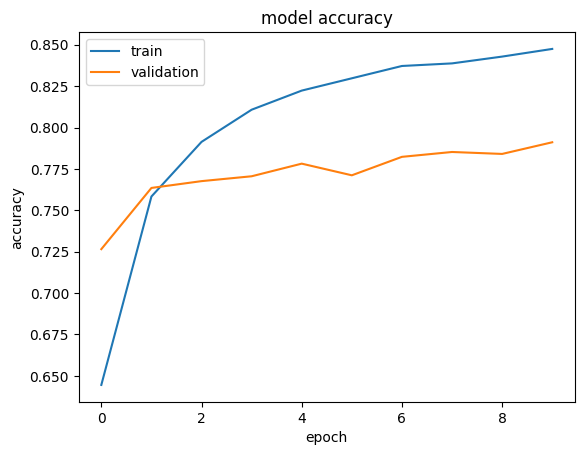

In [50]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'validation'])
plot.show()

## Classic ML

In [29]:
c_dataset = pd.read_csv("labeled_data.csv")

X = c_dataset.content
y = c_dataset.prediction

In [30]:
c_vectorizer = TfidfVectorizer() 
c_content = c_vectorizer.fit_transform(c_dataset['content'])
X_train, X_test, y_train, y_test = train_test_split(c_content, y, test_size=0.3, random_state=123)

#### Logistic Regression

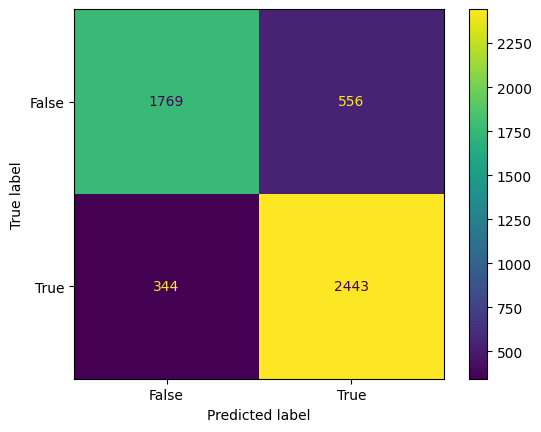

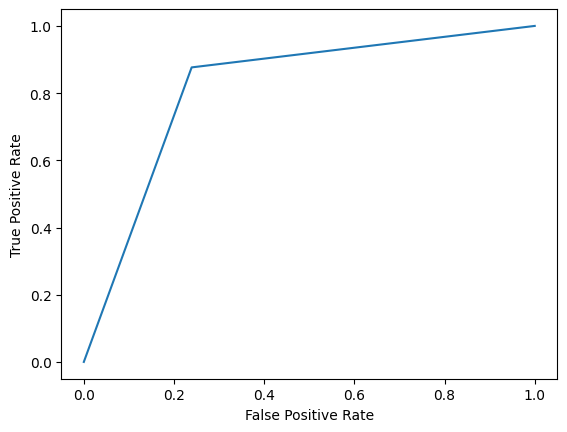

Test Score with logistic regression:  0.823943661971831


In [53]:
regression = LogisticRegression(C=1.0).fit(X_train, y_train)
score_LR = regression.score(X_test, y_test)
y_predict_LR = regression.predict(X_test)
matrix = metrics.confusion_matrix(y_test, y_predict_LR)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict_LR)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Test Score with logistic regression: ', score_LR)

#### LSVC

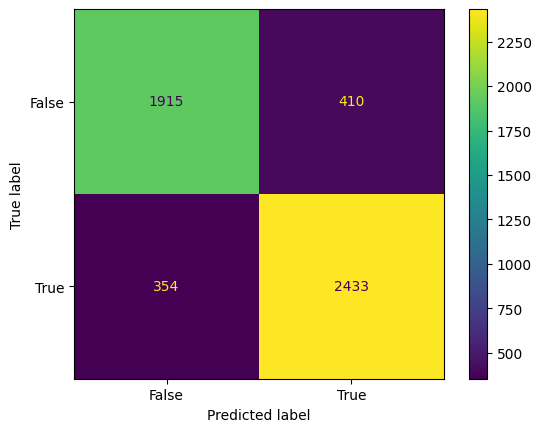

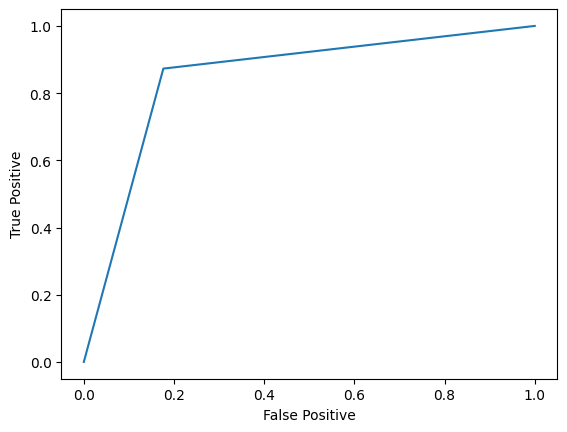

LSVC Accuracy:  0.8505477308294209


In [54]:
LSVC = LinearSVC()
LSVC.fit(X_train,y_train)
y_predict_LSVC = LSVC.predict(X_test)
l_matrix = metrics.confusion_matrix(y_test, y_predict_LSVC)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = l_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict_LSVC)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print("LSVC Accuracy: ", accuracy_score(y_test, y_predict_LSVC))

#### Naive Bayes

In [34]:
n_model = BernoulliNB()
n_model.fit(X_train, y_train)

BernoulliNB()

In [35]:
y_pred_b = n_model.predict(X_test)
print(classification_report(y_test,y_pred_b))

              precision    recall  f1-score   support

           0       0.79      0.49      0.60      2325
           1       0.68      0.89      0.77      2787

    accuracy                           0.71      5112
   macro avg       0.73      0.69      0.69      5112
weighted avg       0.73      0.71      0.69      5112



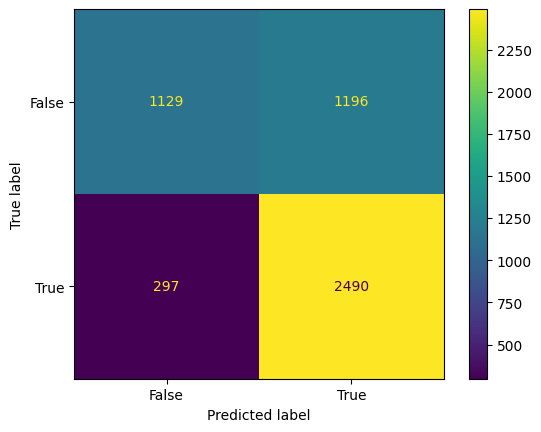

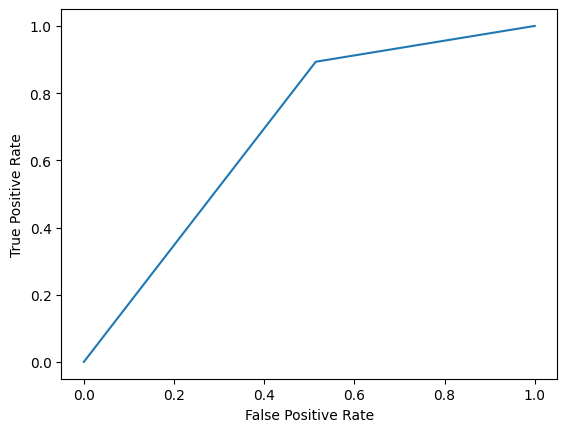

Bayes Accuracy:  0.707942097026604


In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_b)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_b)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Bayes Accuracy: ", accuracy_score(y_test, y_pred_b))

## Language model

BERT

In [3]:
df_language = pd.read_csv("labeled_data.csv", index_col=0) 
df_language.rename(columns={"prediction":"label"}, inplace=True)
df_language.rename(columns={"content":"text"}, inplace=True)
df_language = df_language.drop("sentiment_rate",axis = 1)


ds_ = Dataset.from_pandas(df_language)
ds = ds_.train_test_split(0.1)
df_language.sample(5)

,text,label
17013,literally write_essay red lover specifically r...,0
8170,labour vote settle eu migrant year_old choose ...,0
3318,day mersey queer merseyqueer queermap liverpoo...,0
12903,liverpool look_amazing eurovision night s time...,0
9859,eurovision sweden loreen win second_time paul_...,1


In [4]:
model_checkpoint = 'distilbert-base-uncased'
batch_size = 32

In [5]:
l_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [6]:
def process(df):
  return l_tokenizer(df['text'])

In [7]:
ds_train = ds['train'].map(process)
ds_test = ds['test'].map(process)

Map:   0%|          | 0/15334 [00:00<?, ? examples/s]

Map:   0%|          | 0/1704 [00:00<?, ? examples/s]

In [8]:
l_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [9]:
args = TrainingArguments(
    f'{model_checkpoint}_sentiment_analysis',
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    num_train_epochs = 5,
    weight_decay = 0.03,
    load_best_model_at_end = True,
    metric_for_best_model = 'accuracy',
    logging_steps=10,
)

In [10]:
metric = load_metric('glue', 'sst2')

def compute_metrics(eval_preds):
  logits, labels = eval_preds
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

<ipython-input-10-a6bf47ba013e>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('glue', 'sst2')


In [11]:
trainer = Trainer(
    l_model,
    args,
    train_dataset=ds_train,
    eval_dataset=ds_test,
    tokenizer=l_tokenizer,
    compute_metrics = compute_metrics
)

In [12]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.577000,0.581135,0.687793
2,0.498600,0.528234,0.734742
3,0.365200,0.567109,0.730634
4,0.301600,0.556005,0.755869
5,0.218300,0.594447,0.755869


TrainOutput(global_step=2400, training_loss=0.41958624387780824, metrics={'train_runtime': 408.5073, 'train_samples_per_second': 187.683, 'train_steps_per_second': 5.875, 'total_flos': 1028856174583992.0, 'train_loss': 0.41958624387780824, 'epoch': 5.0})

#### Testing

In [23]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

text = "Well that was beautiful"
inputs = l_tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

In [24]:
with torch.no_grad():
  output = l_model(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

In [25]:
if predictions.item() == 1:
  print('This text is negative')
else:
  print('This text is positive')

This text is positive


In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

text = "This is so cringe, guilty"
inputs = l_tokenizer(text, return_tensors='pt')
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

with torch.no_grad():
  output = l_model(input_ids=input_ids, attention_mask=attention_mask)
  logits = output.logits
  predictions = torch.argmax(logits, dim=-1)

if predictions.item() == 1:
  print('This text is negative')
else:
  print('This text is positive')

This text is negative
